# Moving mirror-field dynamics under intrinsic decoherence

### Alejandro R. Urzúa and Héctor M. Moya-Cessa — (2023)

### Working notebook the upcoming manuscript _"Mirror-field dynamics under intrinsic decoherence"_
---

In [25]:
begin # Inital Packages
    using DelimitedFiles
    using PyPlot
    rc("text", usetex = true)
    using LaTeXStrings
    cd("..")
end

### 0. Theory

We have the Hamiltonian

$$
\begin{equation}
    \nonumber\hat{H} = \omega\hat{n} + \nu\hat{N} + \chi\hat{n}\left(\hat{b}^{\dagger} + \hat{b}\right),
\end{equation}
$$

where $\hat{n}\equiv\hat{a}^{\dagger}\hat{a}$ for the field, and $\hat{N}\equiv\hat{b}^{\dagger}\hat{b}$ for the mirror.

The task is to solve this system under the intrinsic decoherence scheme, given by
$$
\begin{equation}
    \nonumber\hat{\rho}(t) = e^{-\gamma t}\sum\limits_{k = 0}^{\infty}\frac{\left(\gamma t\right)^{k}}{k!}\ket{\psi_{k}}\bra{\psi_{k}},\qquad \ket{\psi_{k}} = e^{-\frac{\mathrm{i}\hat{H} t}{\gamma}}\ket{\psi(0)},
\end{equation}
$$

where $\gamma$ is the decoherence parameter that lead the slope of the decaying dynamics in the system.

See the article at _[doi]_ for the details.

### 1. Expectation values for the mirror

* Number of phonons in the mirror $\braket{\hat{A}}(t)$
* Quadrature amplitude in the mirror $\braket{\hat{b}^{\dagger} + \hat{b}}(t)$

In [2]:
function Nmean(ν, χ, γ, t) # Number of phonons in the mirror
    return real(
        exp(-γ * t) * (
            abs2(β) * exp(γ * t) + (χ/ν) * abs2(α) * conj(β) * (exp(γ * t) - exp(γ * t * exp(1im * ν/γ)))
            + (χ/ν) * abs2(α) * β * (exp(γ * t) - exp(γ * t * exp(-1im * ν/γ)))
            + (χ/ν)^2 * abs2(α) * (1 + abs2(α)) * (2 * exp(γ * t) - (exp(γ * t * exp(1im * ν/γ)) + exp(γ * t * exp(-1im * ν/γ))))
        )
    )
end;

In [3]:
function Qmean(ν, χ, γ, t) # Quadrature amplitude in the mirror
    return real(
        exp(-γ * t) * (
            conj(β) * exp(γ * t * exp(1im * ν/γ)) + β * exp(γ * t * exp(-1im * ν/γ))
            - (χ/ν) * abs2(α) * (2 * exp(γ * t) - (exp(γ * t * exp(1im * ν/γ)) + exp(γ * t * exp(-1im * ν/γ))))
        )
    )
end;

In [4]:
begin # Initial states for the field α and the mirror β
    α = 2im
    β = 1 + 2im

    tlist = LinRange(0, 20, 500) # Time of evaluation
end;

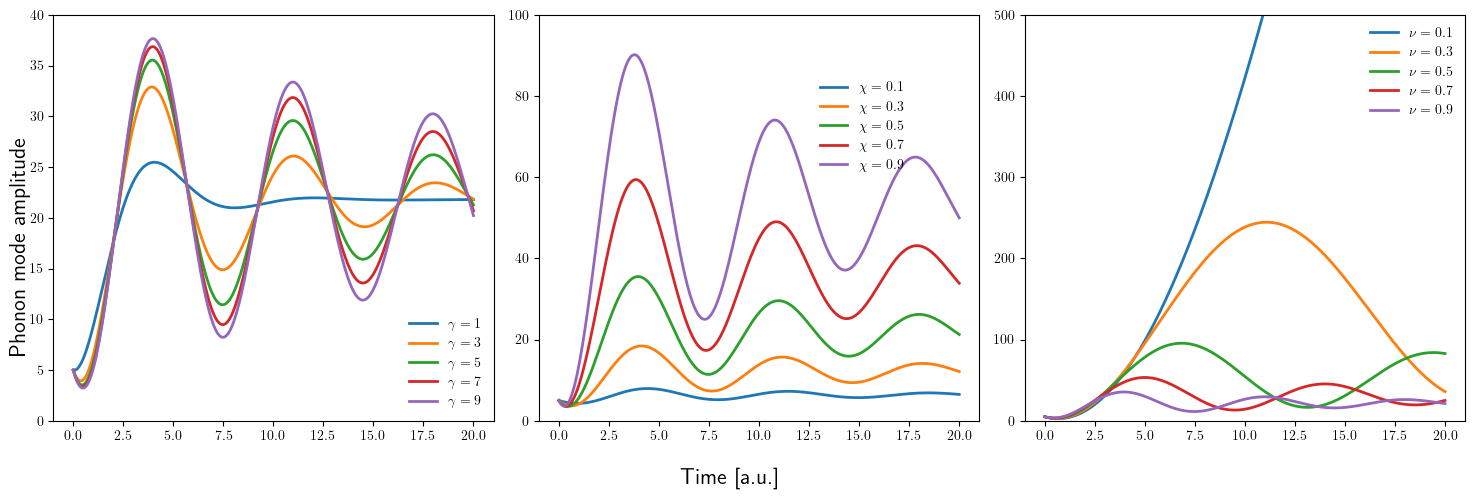

In [27]:
begin # Plot for the number of phonons in the mirror
#    Nmean_fig, (ax1N, ax2N, ax3N) = subplots(3, 1, figsize = (6, 10), sharex = false) # Vertical plot 
    Nmean_fig, (ax1N, ax2N, ax3N) = subplots(1, 3, figsize = (15, 5), sharex = false) # Horizontal plot

    ax1N.plot(tlist, Nmean.(0.9, 0.5, 1, tlist), lw = 2, label = L"\gamma = 1")
    ax1N.plot(tlist, Nmean.(0.9, 0.5, 3, tlist), lw = 2, label = L"\gamma = 3")
    ax1N.plot(tlist, Nmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\gamma = 5")
    ax1N.plot(tlist, Nmean.(0.9, 0.5, 7, tlist), lw = 2, label = L"\gamma = 7")
    ax1N.plot(tlist, Nmean.(0.9, 0.5, 9, tlist), lw = 2, label = L"\gamma = 9")

    ax2N.plot(tlist, Nmean.(0.9, 0.1, 5, tlist), lw = 2, label = L"\chi = 0.1")
    ax2N.plot(tlist, Nmean.(0.9, 0.3, 5, tlist), lw = 2, label = L"\chi = 0.3")
    ax2N.plot(tlist, Nmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\chi = 0.5")
    ax2N.plot(tlist, Nmean.(0.9, 0.7, 5, tlist), lw = 2, label = L"\chi = 0.7")
    ax2N.plot(tlist, Nmean.(0.9, 0.9, 5, tlist), lw = 2, label = L"\chi = 0.9")

    ax3N.plot(tlist, Nmean.(0.1, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.1")
    ax3N.plot(tlist, Nmean.(0.3, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.3")
    ax3N.plot(tlist, Nmean.(0.5, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.5")
    ax3N.plot(tlist, Nmean.(0.7, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.7")
    ax3N.plot(tlist, Nmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.9")

    ax1N.legend(frameon = false, markerscale = 0)
    ax2N.legend(frameon = false, loc = (0.625, 0.6))
    ax3N.legend(frameon = false)

    ax1N.set_ylim((0, 40))
    ax2N.set_ylim((0, 100))
    ax3N.set_ylim((0, 500))

    Nmean_fig.supxlabel("Time [a.u.]", fontsize = 16)
    Nmean_fig.supylabel("Phonon mode amplitude", fontsize = 16)

    tight_layout()

    #= savefig("figures/n_mirror.pdf", dpi = 600)
    savefig("figures/n_mirror.png", dpi = 600) =#

    gcf()
end

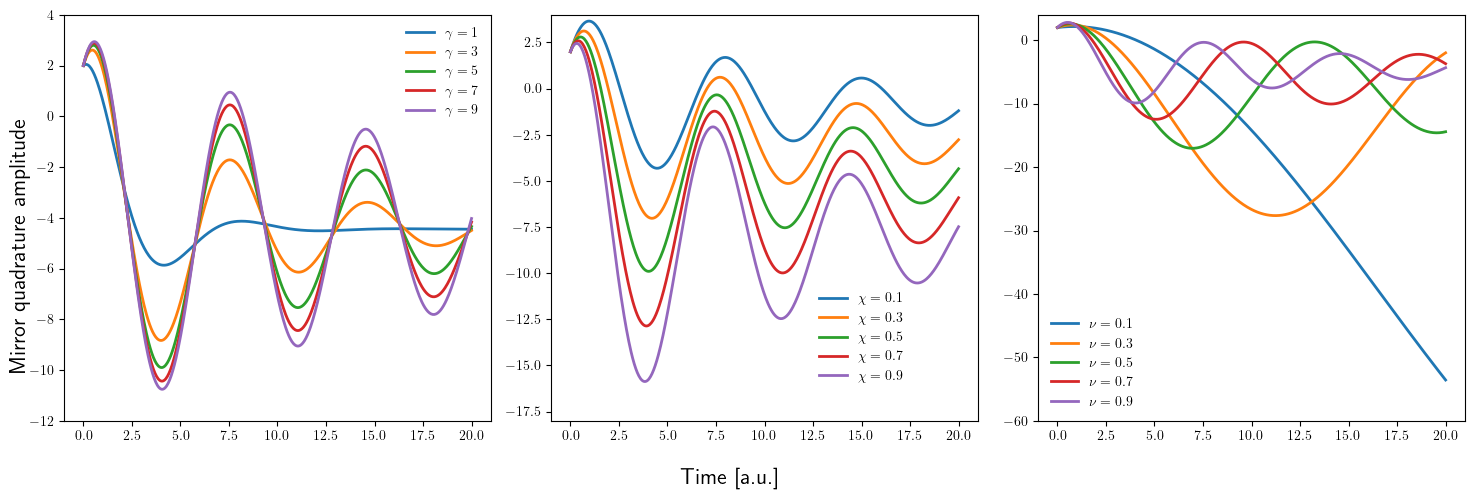

In [28]:
begin # Plot for the quadrature amplitude in the mirror
#    Qmean_fig, (ax1Q, ax2Q, ax3Q) = subplots(3, 1, figsize = (6, 10), sharex = true) # Vertical plot
    Qmean_fig, (ax1Q, ax2Q, ax3Q) = subplots(1, 3, figsize = (15, 5), sharex = true) # Horizontal plot

    ax1Q.plot(tlist, Qmean.(0.9, 0.5, 1, tlist), lw = 2, label = L"\gamma = 1")
    ax1Q.plot(tlist, Qmean.(0.9, 0.5, 3, tlist), lw = 2, label = L"\gamma = 3")
    ax1Q.plot(tlist, Qmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\gamma = 5")
    ax1Q.plot(tlist, Qmean.(0.9, 0.5, 7, tlist), lw = 2, label = L"\gamma = 7")
    ax1Q.plot(tlist, Qmean.(0.9, 0.5, 9, tlist), lw = 2, label = L"\gamma = 9")

    ax2Q.plot(tlist, Qmean.(0.9, 0.1, 5, tlist), lw = 2, label = L"\chi = 0.1")
    ax2Q.plot(tlist, Qmean.(0.9, 0.3, 5, tlist), lw = 2, label = L"\chi = 0.3")
    ax2Q.plot(tlist, Qmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\chi = 0.5")
    ax2Q.plot(tlist, Qmean.(0.9, 0.7, 5, tlist), lw = 2, label = L"\chi = 0.7")
    ax2Q.plot(tlist, Qmean.(0.9, 0.9, 5, tlist), lw = 2, label = L"\chi = 0.9")

    ax3Q.plot(tlist, Qmean.(0.1, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.1")
    ax3Q.plot(tlist, Qmean.(0.3, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.3")
    ax3Q.plot(tlist, Qmean.(0.5, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.5")
    ax3Q.plot(tlist, Qmean.(0.7, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.7")
    ax3Q.plot(tlist, Qmean.(0.9, 0.5, 5, tlist), lw = 2, label = L"\nu = 0.9")

    ax1Q.legend(frameon = false)
    ax2Q.legend(frameon = false, loc = (0.615, 0.08))
    ax3Q.legend(frameon = false)

    ax1Q.set_ylim((-12, 4))
    ax2Q.set_ylim((-18, 4))
    ax3Q.set_ylim((-60, 4))

    Qmean_fig.supxlabel("Time [a.u.]", fontsize = 16)
    Qmean_fig.supylabel("Mirror quadrature amplitude", fontsize = 16)

    tight_layout()

    #= savefig("figures/q_mirror.pdf", dpi = 600)
    savefig("figures/q_mirror.png", dpi = 600) =#

    gcf()
end

In [31]:
close("all") # Close unused figures